# Homework 4: k-means, bag-of-features #


In [325]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

## 2)  k- means##

In [326]:
'''
This function gets the the closest centroid to a point
and the distance between them,

Input:
x- data point
centers- list of centroids

Output:
index- index of the closest centroid in the centers array
min(distances)- The distance between the data-point and the closest center
'''

def get_closest(x, centers):
    distances = []
    
    #get the distance from the point(x) to every centroid
    #and get the index of centroid that yields 
    #the minimum distance 
    
    for mu in centers:
        distances.append(np.linalg.norm(x-mu))
    index = np.argmin(distances)
    
    return index, min(distances)
    


In [327]:
'''
This function implements the k-means algorithm described in Sec 22.2.1
of the textbook. It initializes k centroids randomly. Then, it assigns 
all the data-points to one of the k clusters and assigns new centroids.
This is repeated for max_iter iterations.

Input:
p- data points to be clustered
k- number of clusters
max_iter- number of iterations 

Output:
C- Information about which cluster each data-point corresponds to
centers- list of k centroids
'''
def mykmeans(p, k, max_iter):
    
    #generate k centroids 
    centers = random.sample(p,k)
    

    for t in range(max_iter):    
        C=[0]*len(p)
        
        #assign clusters to each point
        #Note: the list C stores the index of the closest centroid 
        #in the centers list rather than storing the actual centroid
        
        for i in range(len(p)):
            index = get_closest(p[i], centers)[0]
            C[i] = index
              
        C = np.array(C)
        
        #assign new centers 
        centers = [p[C==j].mean(axis = 0) for j in range(k)]
 
    return C, centers

In [341]:
'''
Function to plot the output of the kmeans algorithm

Input:
C- Information about which cluster each data-point corresponds to
centers- list of centroids (PCA is used to reduce 
       the dimensions to 2)
X_pca- the data_points to be plotted (PCA is used to reduce 
       the dimensions to 2)
k - number of clusters
'''
def plot_kmeans(C,centers,X_pca,k):
    
    #choose random colour for the centroids
    marker_c = [random.random() for y in range(3)]

    for i in range(k):
        
            #plot data-points corresponding to a specific cluster
            #with a random colour and plot the centroid of that 
            #cluster
            
            x = X_pca[C==i]
            colour = [random.random() for c in range(3)]
            plt.scatter(x[:,0],x[:,1], color=colour)
            plt.scatter(centers[i][0], centers[i][1], marker='s', c = marker_c, s = 40)
           

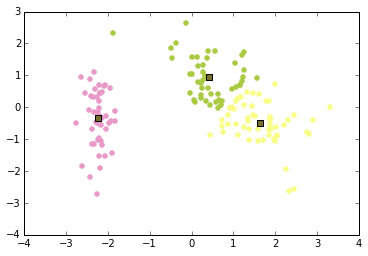

In [342]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

np.random.seed(12222015)

iris = load_iris() 
X = iris.data
Y = iris.target

X_scaled = preprocessing.scale(X)

k = 3
C, centers = mykmeans(X_scaled, k, 50)

#use PCA to reduce the dimenions to 2(for plotting)
pca = PCA(n_components=2)
pca.fit(X_scaled)

centers_pca = pca.transform(centers) 
X_pca = pca.transform(X_scaled) 

plot_kmeans(C, centers_pca, X_pca, k)


In [330]:
'''
This function returns the value of the k-means objective function

Input:
X- data points to be clustered
k- number of clusters
C- Information about which cluster each data-point corresponds to
centers- list of k centroids 

Output:
sum_distance - value obtained by evaluating the k means objective function

'''

def k_means_objective(X, k, C, centers):
    
    sum_distance = 0
    for j in range(k):
        for x in X[C==j]:
            sum_distance += (np.linalg.norm(x-centers[j]))**2
                
    return sum_distance

In [347]:
'''
This function is a modified version of the mykmeans function. 
The k means algorithm from before is run multiple times starting from 
different random draws of the initial centroids. It calculates the 
k-means objective function for each run and picks the centroids 
corresponding to the smallest value of the function over all runs.

Input:
p- data points to be clustered
k- number of clusters
max_iter- number of iterations for the k-means algorithm
runs- number of times the k-means algorithm is run

Output:
C- Information about which cluster each data-point corresponds to
centers- list of k centroids 

'''
def mykmeans_multi(p, k, max_iter, runs):
    
    distortion = [] # store distortion calculated after each run
    centers_list = [] #store list of centroids for each run
    C_list = [] #store information about which cluster each 
                #data-point corresponds to for each run
    
    d = [] #store list of distortions for each iteration in each run
    c1 = []
    C1 = []
    for r in range(runs):
        centers = random.sample(p,3)
        
        c_i = [] # centers for each iteration
        c_i.append(centers)
        C_i = [] # clusters for each iteration
        d_i = [] #store distortion of each iteration
        
        for t in range(max_iter):  
            
            C=[0]*len(p)
            
            #assign clusters
            for i in range(len(p)):
                index = get_closest(p[i], centers)[0]
                C[i] = index
        
            
            C = np.array(C)
            
            d_i.append(k_means_objective(p, k, C, centers))
            
            #calculate new centroids
            centers = [p[C==j].mean(axis = 0) for j in range(k)]
            
            C_i.append(C) #store clustering information for this iteration
            c_i.append(centers) #store list of centroids for this iteration
            #calculate and store distortion for this iteration
            
        
        C1.append(C_i)
        c1.append(c_i)
        d.append(d_i)
        centers_list.append(centers)
        C_list.append(C)
        #calculate the distortion for the run
        distortion.append(k_means_objective(p, k, C, centers))
    
    
    #get index of run with minimum distortion
    min_index = np.argmin(distortion)                  
    return C_list[min_index], centers_list[min_index], d[min_index], c1[min_index], C1[min_index]

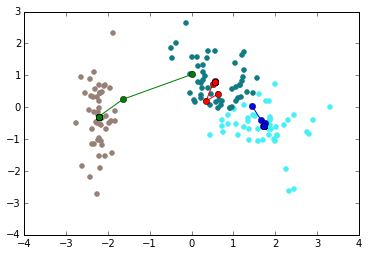

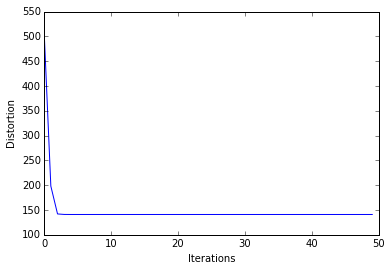

In [378]:
k = 3
C1, centers1, distortion, centers_list, C_list = mykmeans_multi(X_scaled, k,50, 10)
centers1_pca = pca.transform(centers1) 


for j in range(len(centers_list)):
    centers_list[j] = pca.transform(centers_list[j])

    
centers_list = np.array(centers_list)    

marker_c = [random.random() for y in range(3)]

for i in range(k):
        
            
    x = X_pca[C1==i]
    colour = [random.random() for c in range(3)]
    plt.scatter(x[:,0],x[:,1], color=colour)

#plot centroids over all iterations connected by a line
for l in range(k):
    plt.plot(centers_list[:,l][:,0], centers_list[:,l][:,1], '-o')

    
#plot of distortion vs number of iterations
plt.figure()
index1= [i for i in range(50)]
plt.plot(index1, distortion)
plt.xlabel('Iterations')
plt.ylabel('Distortion')


IndexError: index 3 is out of bounds for axis 1 with size 3

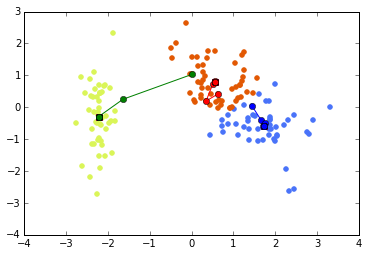

In [469]:
'''
This is an alternative way to depict the changes in clustering and the
changes in centroids over different iterations
'''

import time
marker_c = [random.random() for y in range(3)]
from IPython import display

colour = []
for i in range(k):           
    colour.append([random.random() for c in range(3)])
    

for m in range(10):
    plt.clf()
    for i in range(k):
        x = X_pca[C_list[m]==i]
        plt.scatter(x[:,0],x[:,1],color = colour[i]) 
        c = plt.scatter(centers_list[m][:,0], centers_list[m][:,1], marker = 's', color = marker_c, s = 40) 
        display.display(plt.gcf())
        display.clear_output(wait=True)
       
    
    time.sleep(2)
    
for l in range(k):
    plt.plot(centers_list[:,l][:,0], centers_list[:,l][:,1], '-o')
        

In [391]:

def mykmeans_plus_plus(p, k, max_iter):
    centers = []
    centers_list = []
    distortion = []
    centers.append(random.sample(p,1))
    
    for r in range(k-1):
        x = random.random()
        num_dx = (get_closest(p[0],centers)[1])**2
        den_dx = 0
        for x_i in p:
            den_dx += (get_closest(x_i,centers)[1])**2
        index = 0
        while num_dx/den_dx < x:
            
            index += 1
            num_dx += (get_closest(p[index],centers)[1])**2

        centers.append(p[index])
    
    centers_list.append(centers)
    for t in range(max_iter):    
        C=[0]*len(p)
        
        
        #assign clusters
        for i in range(len(p)): 
            index = get_closest(p[i], centers)[0]
            C[i] = index
        
        C = np.array(C)
        
        distortion.append(k_means_objective(p, k, C, centers))
        
        centers = [p[C==j].mean(axis = 0) for j in range(k)]
        centers_list.append(centers)
        
    return C, centers, distortion, centers_list  

IndexError: index 3 is out of bounds for axis 0 with size 3

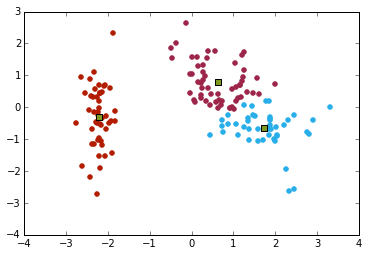

In [516]:
C2, centers2, distortion, centers_list2 = mykmeans_plus_plus(X_scaled, k1,50)
centers2_pca = pca.transform(centers2) 



    
centers_list2 = np.array(centers_list2)
plot_kmeans(C2, centers2_pca, X_pca, k)


#for l in range(k):
   #plt.plot(centers_list2[:,l][:,0], centers_list2[:,l][:,1], '-o')
    
    
plt.figure()
index1= [i for i in range(50)]
plt.plot(index1, distortion)
plt.xlabel('Iterations')
plt.ylabel('Distortion')


[3, 30, -3, 1]

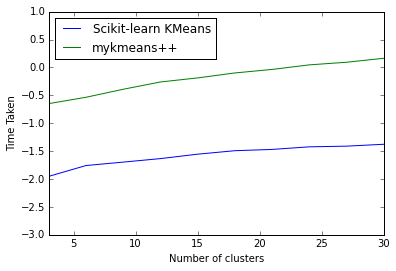

In [453]:
'''
Compare the running time of mykmeans++ to the Scikit-Learn’s sklearn.cluster.KMeans,
for different values of the number of clusters
'''

from sklearn.cluster import KMeans

sk =[]
my = []


clusters = [i*3 for i in range(1,11)]

for k in clusters:
    
    #get running time of Scikit-Learn's KMeans
    sk_start = time.time()
    kmeans = KMeans(n_clusters=k, n_jobs = 1)
    kmeans.fit(X_scaled)
    sk_end = time.time()
    sk.append( sk_end- sk_start)
    
    #get running time of mykmeans_plus_plus
    my_start = time.time()
    C2, centers2, distortion, centers_list2 = mykmeans_plus_plus(X_scaled, k,50)
    my_end = time.time()
    my.append(my_end - my_start)
    
    

plt.plot(clusters, np.log10(sk), label = 'Scikit-learn KMeans')
plt.plot(clusters, np.log10(my), label = 'mykmeans++')

plt.xlabel('Number of clusters')
plt.ylabel('Time Taken')
plt.legend(loc='upper left')

plt.axis([3, 30, -3, 1])

#labels = kmeans.labels_
#centroids = kmeans.cluster_centers_

#plot_kmeans(labels, centroids,X_pca, k)



## 3) Bag-of-features##
### 3.1 Bag-of-words###
Exercise 2 "sentiment analysis on movie reviews can be found in the file exercise_02_sentiment.py. 

In [478]:
def get_spectrogram(filename, length):
    w = wave.open(filename,"rb")

    #returns a named tuple (nchannels, sampwidth, framerate, 
    # nframes, comptype, compname)
    waveParams = w.getparams()

    s = w.readframes(waveParams[3])
    w.close()
    waveArray = np.fromstring(s, np.int16)

    spectrum, freq, bins = mlab.specgram(waveArray, NFFT=length ,Fs=waveParams[2],sides='onesided')

    spectrum = spectrum.T

    for i in range(len(spectrum)):
        for j in range(len(spectrum[0])):
            spectrum[i][j] = np.sqrt(spectrum[i][j])


    spectrum_normalize = preprocessing.normalize(spectrum, norm='l2')

    return spectrum_normalize

In [479]:
def learnvocabulary(filename, k, length, max_iter):
    
    spectrum_normalize = get_spectrogram(filename, length)
    return  mykmeans_plus_plus(spectrum_normalize, k, max_iter)[1]

    

In [485]:
def getbof(filename, length, vocab):
    spectrum = get_spectrogram(filename, length)
    
    vocab = np.array(vocab)
    spectrum = np.array(spectrum)
    
    freq =[0]*vocab.shape[0]
    for i in range(spectrum.shape[0]):
        index = get_closest(spectrum[i], vocab)[0]
        freq[index] += 1
        
        
    return freq
        
        
    

(array([ 3223.,  5205.,  2313.,  4129.,  4820.,  3651.,  3491.,  6524.,
         3231.,  4544.]),
 array([  0. ,   1.9,   3.8,   5.7,   7.6,   9.5,  11.4,  13.3,  15.2,
         17.1,  19. ]),
 <a list of 10 Patch objects>)

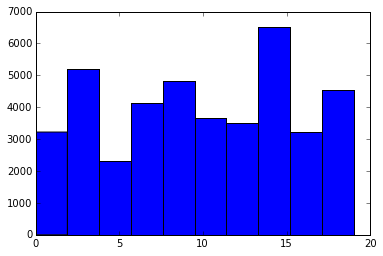

In [493]:
import wave, struct, numpy as np, matplotlib.mlab as mlab, pylab as pl
from sklearn import preprocessing

filename1 = "train.wav"
k = 20
length = 256
max_iter = 50

filename2 = "test.wav"

vocab = learnvocabulary(filename1, k, length, max_iter)
freq = getbof(filename2, length, vocab)


## the bars
plt.hist(range(k), weights=freq)

    


In [513]:
import wave, struct, numpy as np, matplotlib.mlab as mlab, pylab as pl
from sklearn import preprocessing

k = 5
length = 256
max_iter = 50

filename1 = "Sebastian.wav"
filename2 = "Aarti.wav"

#get vocabulary by combining spectrogram of both of our voices
spectrum_normalize1 = get_spectrogram(filename1, length)
spectrum_normalize2 = get_spectrogram(filename2, length)

spectrum =  np.vstack((spectrum_normalize1, spectrum_normalize2))
returns  = mykmeans_plus_plus(spectrum , k, max_iter)
vocab = returns[1]
distortion = returns[2]
freq1 = getbof(filename1, length, vocab)
freq2 = getbof(filename2, length, vocab)

filename3 = "Sebastian_Random.wav"
filename4 = "Aarti_Random.wav"

freq3 = getbof(filename3, length, vocab)
freq4 = getbof(filename4, length, vocab)


freq1 = np.array(freq1)
freq2 = np.array(freq2)
freq3 = np.array(freq3)
freq4 = np.array(freq4)

print(np.linalg.norm(freq1- freq3))
print(np.linalg.norm(freq2- freq4))
print()
print(np.linalg.norm(freq1- freq4))
print(np.linalg.norm(freq2- freq3))
## the bars
#plt.hist(range(k), weights=freq)

3839.14052882
3509.26203068
()
3099.18150485
4312.92174749


In [518]:

'''
If we would have used Knearest neighbours, code for grid search -

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("best parameters: %s" % grid.best_params_)
print("Training set accuracy: %s" % grid.score(X_train, y_train))
print("Test set accuracy: %s" % grid.score(X_test, y_test))
'''

'\nIf we would have used Knearest neighbours, code for grid search -\n\ngrid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)\ngrid.fit(X_train, y_train)\nprint("best parameters: %s" % grid.best_params_)\nprint("Training set accuracy: %s" % grid.score(X_train, y_train))\nprint("Test set accuracy: %s" % grid.score(X_test, y_test))\n'